<a href="https://colab.research.google.com/github/chanseongparkk/2022_Data_Analysis_Intern_practice/blob/main/07_12_03_%EC%97%B0%EC%86%8D%ED%99%95%EB%A5%A0%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3. 연속확률분포

In [ ]:
# 패키지 임포트
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# os에 따른 font 깨짐 제거를 위해 font 지정

import os

if os.name == "nt":
    font_family = "Malgun Gothic"
else: #mac os
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정

sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

import warnings
warnings.filterwarnings("ignore")

### 1. 정규분포

* 평균을 중심으로 좌우대칭이고 종 모양을 갖는 확률분포

stats.norm(loc = 기댓값, scale = 표준편차)

In [ ]:
### 기댓값이 70이고 표준편차가 10인 정규분포 생성

norm = stats.norm(loc = 70, scale = 10)

In [ ]:
## 구간 내에 숫자를 균일한 간격으로 생성(X축)
# -10 ~ 150까지 2000개 생성

s_x = np.linspace(-10, 150, 2000)

# 확률밀도함수

s_pdf = norm.pdf(s_x)

In [ ]:
## 확률밀도함수 계산

mu = 70
sigma = 10
s_pdf_cal = (1/np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(s_x-mu)**2 / (2 * sigma**2))
print(s_pdf_cal)

[5.05227108e-16 5.38618771e-16 5.74180583e-16 ... 5.74180583e-16
 5.38618771e-16 5.05227108e-16]


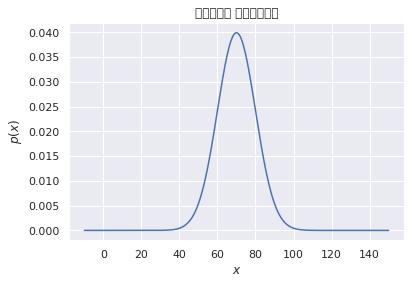

In [ ]:
# 정규분포 시각화

plt.plot(s_x, s_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [ ]:
## 누적분포함수

s_cdf = norm.cdf(s_x)

## 누적분포함수 계산

from scipy.special import erf
s_cdf_cal = 0.5 * (1 + erf((s_x-mu)/(np.sqrt(2 * sigma**2))))
print(s_cdf_cal)

[6.10622664e-16 6.66133815e-16 7.21644966e-16 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


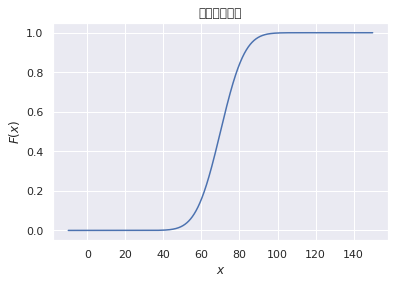

In [ ]:
### 누적분포함수 시각화

plt.plot(s_x, s_cdf)
plt.title("누적분포함수")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()

### 2. 표준정규분포

*  표준화 확률변수 Z에 의해 변환과정을 거쳐 평균이 0이고 표준편차가 1로 정리된 정규분포

stats.norm(loc = 0, scale = 1)

In [ ]:
### 기댓값이 70이고 표준편차가 10인 정규분포 생성

norm = stats.norm(loc = 0, scale = 1)

In [ ]:
## 구간 내에 숫자를 균일한 간격으로 생성(X축)
# -5 ~ 5까지 2000개 생성

s_nx = np.linspace(-5, 5, 2000)

# 확률밀도함수

s_pdf = norm.pdf(s_nx)

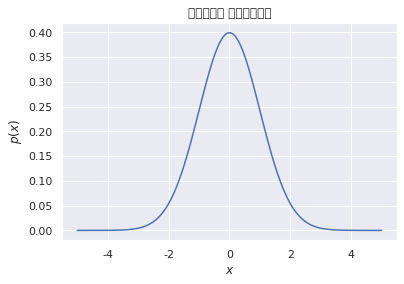

In [ ]:
# 정규분포 시각화

plt.plot(s_nx, s_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

### 3. 표준화

* 정규분포를 평균이 0이고 표준편차가 1인 표준정규분포로 정리하는 과정

stats.norm(loc = 0, scale = 1)

In [ ]:
## 랜덤 데이터 생성
n_data = np.random.randint(1,100,size = 100)
n_data = np.sort(n_data)
n_data.shape

(100,)

In [ ]:
## n_data의 평균과 표준편차 계산
n_mean = np.mean(n_data)
print("mean : ", round(n_mean,2))

n_std = np.std(n_data)
print("standard deviation : ", round(n_std,2))

mean :  48.76
standard deviation :  25.61


In [ ]:
### 확률밀도함수

norm_n_data = stats.norm(loc = n_mean, scale = n_std)

n_pdf = norm_n_data.pdf(n_data)
n_pdf.shape

(100,)

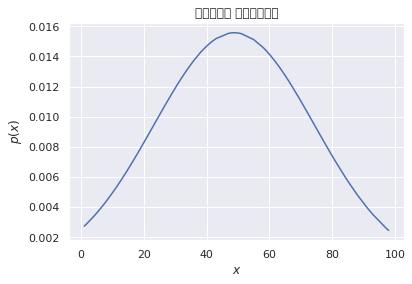

In [ ]:
# 정규분포 시각화

plt.plot(n_data, n_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [ ]:
### 표준화 수행

z_data = list(n_data)
z_data_list = []

for i in z_data:
  z = (i-n_mean)/n_std
  z_data_list.append(z)

In [ ]:
### 표준정규분포 확률밀도함수

norm_z_data = stats.norm(loc = 0, scale = 1)
z_pdf = norm_z_data.pdf(z_data_list)

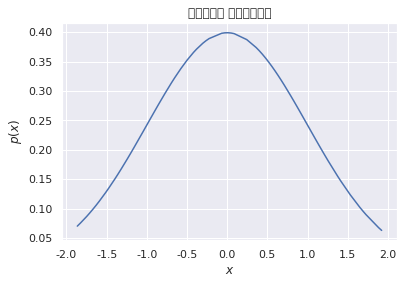

In [ ]:
## 표준정규분포 시각화

plt.plot(z_data_list, z_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

### 4. 카이제곱분포

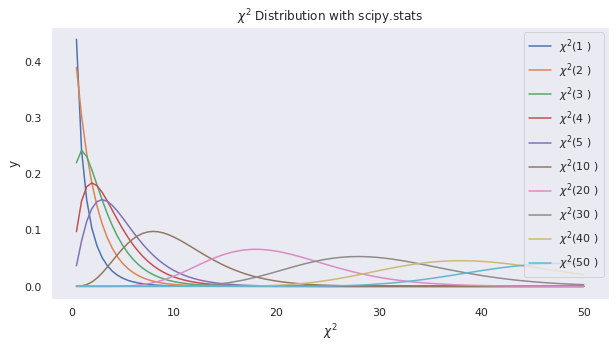

In [ ]:
### 카이제곱분포 표현
from scipy.stats import chi2

# 라인스페이스 x축 설정

chi_x = np.linspace(0.5, 50, 100)

# 자유도에 따른 카이제곱분포 시각화

plt.figure(figsize = (10,5))
for dof in [1,2,3,4,5,10,20,30,40,50]:
  plt.plot(chi_x, chi2(dof).pdf(chi_x),
           label = r'$\chi^2$(' + str(dof) + ' )')
  
plt.xlabel(r'$\chi^2$')
plt.ylabel("y")
plt.grid()
plt.title(r'$\chi^2$ Distribution with scipy.stats')
plt.legend()
plt.show()

In [ ]:
### 카이제곱분포를 이용한 적합성검정
## 한 개의 판매지역 명목변수에 값 확인 결과 서울, 인천, 대구 지역에서 판매
## 교차분석표 생성(자유도 2)

# 관찰도수
x_o = [324, 78, 261]

# 기대도수
x_e = [371, 80, 212]

# 지역별 A 제품의 판매 수

x_crosstab = pd.DataFrame([x_o, x_e],
                           columns = ['서울', '인천', '대구'],
                           index = ['관찰도수', '기대도수'])

x_crosstab

,서울,인천,대구
관찰도수,324,78,261
기대도수,371,80,212


In [ ]:
## 카이제곱통계량 계산

from scipy.stats import chisquare

result = chisquare(x_o, f_exp = x_e)
result

# 카이제곱통계량은 약 17.33이고 p-value는 약 0.0002로 유의수준 5% 이내에서 관찰빈도와 기대빈도가 같다는 귀무가설을 기각한다.
# 즉 관찰빈도와 기대빈도는 다르다

Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

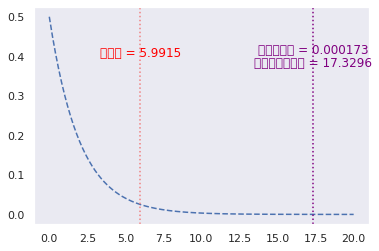

In [ ]:
### 위 사례의 카이제곱분포 시각화

dof = 2 #자유도
x_chi_l = np.linspace(0, 20, 201)
pdf_chi = chi2(dof).pdf(x_chi_l)

# 유의수준 5%

x95_c = chi2(dof).ppf(.95)
plt.plot(x_chi_l, pdf_chi, 'b--')

# 95% 임계값 표시

plt.axvline(x = x95_c, color = "lightcoral", linestyle = ":")
plt.text(x95_c, .4, '임계값 = ' +str(round(x95_c,4)),
         horizontalalignment = 'center', color = 'red')

# 위에서 구한 카이제곱분포 통계량 : result[0]

plt.axvline(x = result[0], color = "purple", linestyle = ":")
plt.text(result[0], .4, '카이제곱통계량 = ' +str(round(result[0],4)), va = 'top',
         horizontalalignment = 'center', color = 'purple')
plt.text(result[0], .4, 'P-value = ' +str(round(result[1],6)),va = 'bottom',
         horizontalalignment = 'center', color = 'purple')
plt.grid()
plt.show()